In [1]:
print("Hello Universe")

Hello Universe


___The tidal force is a gravitational effect that stretches a body along the line towards the center of mass of another body due to a gradient (difference in strength) in gravitational field from the other body; it is responsible for diverse phenomena, including tides, tidal locking___   
Youtube Video - https://youtu.be/KlWpFLfLFBI

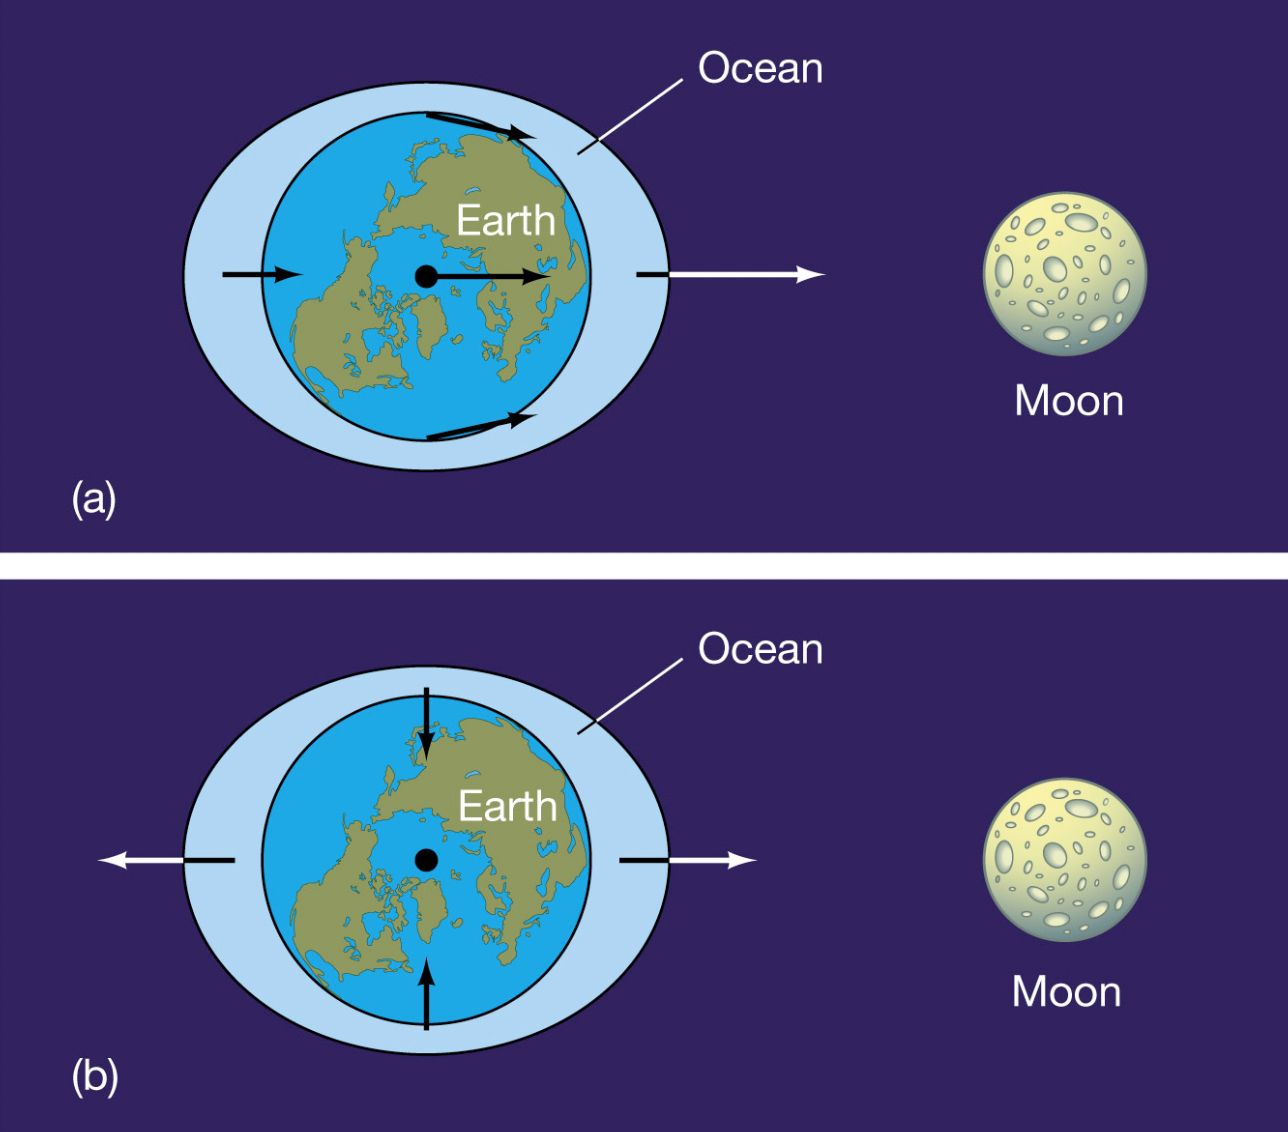

In [2]:
import numpy as np
from scipy.constants import g,G
from astropy.constants import R_earth,M_earth

M = 0.07346e24 # mass of the moon in kg
r = 3.844e8 # semi-major axis of moon orbit in m

coeff = G*M/r**3
accel_scale = 2*coeff*R_earth.value
print("tidal acceleration = {:.2e} m/s^2 = {:.2e} g".\
format(accel_scale,accel_scale/g))

h = 15*M*R_earth.value**4/(8*M_earth.value*r**3)
print("size of tidal bulge = {:.2f} m".format(h))

# array of evenly spaced grid points along x- and y-axis
X = np.linspace(-1.1, 1.1, num=23, endpoint=True)
Y = np.linspace(-1.1, 1.1, num=23, endpoint=True)
print(X)

# create two-dimensional mesh grid scaled by Earth radius
R_x, R_y = np.meshgrid(R_earth.value*X, R_earth.value*Y)
print(R_x.shape)
print(R_x[11,21],R_y[11,21])

# radial distances of mesh points from (0,0)
R = np.sqrt(R_x*R_x + R_y*R_y)

# components of tidal acceleration field within Earth radius
accel_x = np.ma.masked_where(R > R_earth.value, 2*coeff*R_x)
accel_y = np.ma.masked_where(R > R_earth.value, -coeff*R_y)

tidal acceleration = 1.10e-06 m/s^2 = 1.12e-07 g
size of tidal bulge = 0.67 m
[-1.1 -1.  -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2
  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1]
(23, 23)
6378100.0 0.0


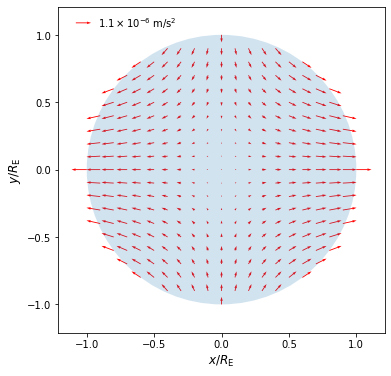

In [10]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
%matplotlib inline

fig, ax = plt.subplots(figsize=(6,6))
ax.set_aspect('equal')

# plot vector field
arrows = ax.quiver(X, Y, accel_x, accel_y, color='red')
ax.quiverkey(arrows, X=0.1, Y=0.95, U=accel_scale,
label=r'$1.1\times 10^{-6}\;\mathrm{m/s}^2$',
labelpos='E')

# add a circle
circle = Circle((0, 0), 1, alpha=0.2, edgecolor=None)
ax.add_patch(circle)

ax.set_xlabel(r'$x/R_{\mathrm{E}}$', fontsize=12)
ax.set_ylabel(r'$y/R_{\mathrm{E}}$', fontsize=12)

plt.show()